In [1]:
#  Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# sample customer reviews dataset (10 positive, 10 negative)
data = {
    'review': [
        'I love this product!',
        'Worst experience ever.',
        'Absolutely fantastic!',
        'Not what I expected.',
        'Highly recommend it.',
        'Terrible service.',
        'Will buy again.',
        'Disappointed with quality.',
        'Exceeded my expectations!',
        'Horrible packaging and broken item.',
        'Amazing performance and great value.',
        'Would not buy this again.',
        'Customer support was very helpful.',
        'Very poor build quality.',
        'This is the best I’ve used so far!',
        'Received wrong item, very disappointed.',
        'Impressed by the speed and quality.',
        'Did not work as advertised.',
        'A must-buy for everyone!',
        'Totally useless and waste of money.'
    ],
    'sentiment': [
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0  # 1 = Positive, 0 = Negative
    ]
}


In [3]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [4]:
#  Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.3, random_state=42
)

In [5]:
# Convert text data into TF-IDF feature vectors
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit on training data
X_test_tfidf = tfidf.transform(X_test)        # Transform test data

In [6]:
#  Train a Logistic Regression model on the TF-IDF vectors
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [7]:
#  Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

#  Evaluate the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.6666666666666666

 Confusion Matrix:
 [[2 2]
 [0 2]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



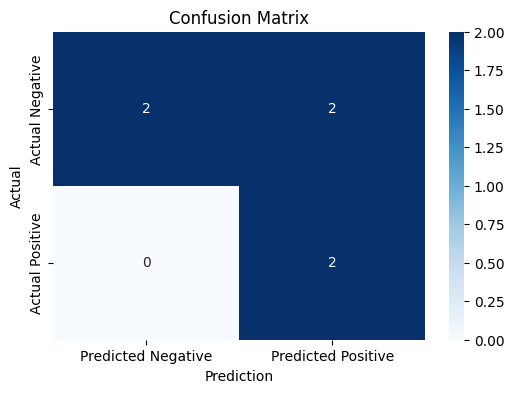

/tmp/ipython-input-8-2477732087.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


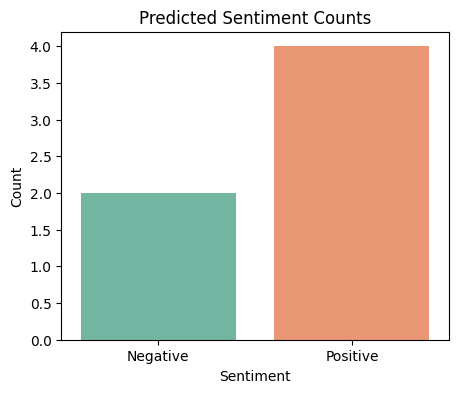

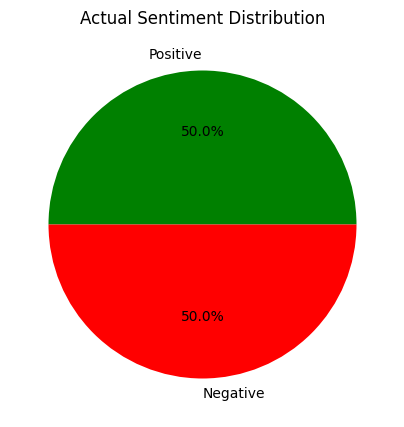

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Plot bar chart of prediction counts
plt.figure(figsize=(5, 4))
sns.countplot(x=y_pred, palette='Set2')
plt.title("Predicted Sentiment Counts")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Plot pie chart of actual sentiment distribution
plt.figure(figsize=(5, 5))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Positive', 'Negative'], colors=['green', 'red'])
plt.title("Actual Sentiment Distribution")
plt.ylabel("")
plt.show()
